학습 : 인공지능이 Rule을 발견하는 것

모델의 일반화 : 모델이 어느 곳에 특화된 것이 아니라 훈련 데이터를 넘어서 새롭고 보이지 않는 데이터에 대해 정확하게 예측할 수 있는 능력

## 언더피팅 : 학습이 덜 이루어진 상태

## 오버피팅 : 학습이 더 이루어진 상태 

why? : 데이터가 부족해 일반화가 덜 되거나 모델이 너무 간단해서

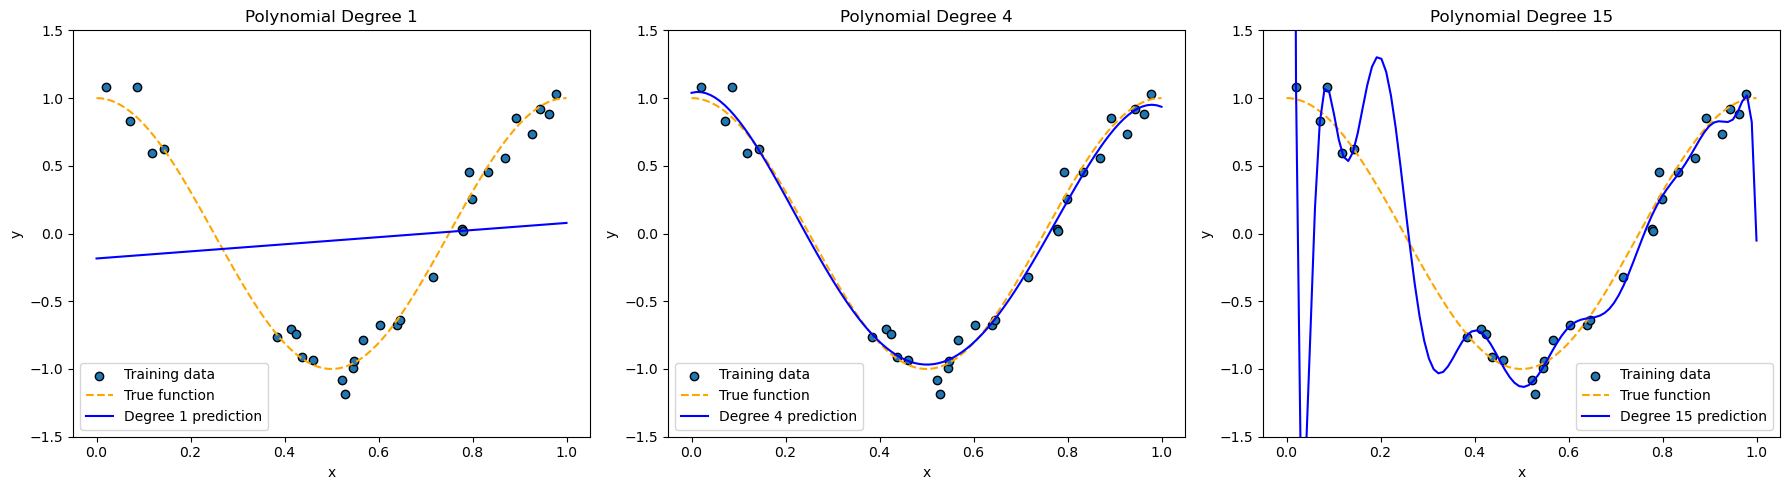

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 데이터 생성
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = np.cos(2 * np.pi * X) + np.random.normal(0, 0.1, n_samples)

X_test = np.linspace(0, 1, 100).reshape(-1, 1)

# 모델 학습
degrees = [1, 4, 15]

plt.figure(figsize=(18, 5))
for i, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X.reshape(-1, 1), y)
    y_pred = model.predict(X_test)

    plt.subplot(1, 3, i + 1)
    plt.scatter(X, y, edgecolor='k', label="Training data")
    plt.plot(X_test, np.cos(2 * np.pi * X_test), label="True function", linestyle="dashed", color='orange')
    plt.plot(X_test, y_pred, label=f"Degree {degree} prediction", color='blue')
    plt.title(f"Polynomial Degree {degree}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.ylim(-1.5, 1.5)
    plt.legend()

plt.tight_layout()
plt.show()


degree 1(1차) : 언더피팅 발생

degree 4(4차) : 적절한 모델

degree 15(15차) : 모델이 너무 complex, 오버피팅 발생

### 언더피팅 해결책
: 모델이 단순해 패턴을 제대로 학습하지 못하니 모델을 복잡하게 하거나 더 풍부한 특성(feature engineering)을 사용한다.

### 오버피팅 해결책
: 모델이 복잡해 일반화가 제대로 안 되니 규제, 모델 단순화, 데이터 양을 늘린다.

### 샘플링 편향
: 훈련 데이터와 테스트 데이터가 고루 섞이지 않고 샘플링한 한쪽으로 치우친 것

### 지도학습, 비지도학습

지도학습과 비지도학습은 정답이 있는지 없는지에 따라 작동한다.

정답이 있는 지도학습은 모델이 입력->정답 관계를 학습해 새로운 입력에 대한 답을 예측할 수 있게 된다.

| 항목        | 지도학습 (Supervised Learning) | 비지도학습 (Unsupervised Learning) |
|-------------|-------------------------------|-------------------------------------|
| 정답(레이블) | 있음                          | 없음                                |
| 목적        | 정답을 예측                   | 패턴 발견, 군집화                   |
| 예시        | 고양이/강아지 분류, 가격 예측 | 고객 군집화, 이상치 탐지           |
| 알고리즘    | 선형회귀, SVM, 신경망 등      | K-평균, PCA, DBSCAN 등              |

### 회귀 
x와y의 상관관계를 구하는 것

### 결졍계수

1-{(타깃-예측)제곱 의 합/(타킷-평균)제곱의 합}

모델이 얼마나 잘 예측했는지 평가하는 지표

R의 범위는 -1 ~ 1이다.

### 규제

과적합을 방지하기 위해 불필요한 가중치를 줄이거나 일반화된 모델을 만드는 것

규제의 목적 : 과적합방지

L2 : 없애지 말고 가중치를 줄이는 것
L1 : 주요 피쳐 말고 나머지를 없애는 것